# Exploratory Data Analysis - Jets

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from plot_utils import plot_1Dhist, display_statistics

In [129]:
def read_data(fname, dir="../data/"):
    # Read data from csv file
    return pd.read_csv(os.path.join(dir, fname))

def save_fig(fig, fname, dir="../plots/eda/"):
    # Save figure to file
    fig.savefig(os.path.join(dir, fname), dpi=300, facecolor="w")

In [141]:
JET_FNAME      = "jet_df.csv"

FONTSIZE = 16

SAVE_FIG = False

---

In [131]:
# read in the data
jet_df = read_data(JET_FNAME)

# display the first 5 rows of the data
jet_df.head()

,eventID,jetID,nParticles,jetArea,jetPx,jetPy,jetPz,jetE,jetPolarPx,jetPolarPy,jetPolarPz,jetPolarE,jetPhi,jetTheta
0,0,0,23,2.004635,-241.374752,0.754266,219.719568,330.240926,241.375931,0.816488,3.138468,50.200008,3.138468,0.832331
1,0,1,41,1.974715,178.037584,-5.547558,536.195118,566.155630,178.123993,1.821678,-0.031149,36.039368,-0.031149,0.320730
2,1,2,26,2.004635,157.606353,198.511810,-237.355351,348.306921,253.469330,-0.835698,0.899762,27.082243,0.899762,2.323376
3,1,3,20,2.024582,-141.065390,-96.179119,-883.349503,900.496654,170.733322,-2.345976,-2.543183,37.921139,-2.543183,2.950667
4,2,4,62,2.044528,56.939189,187.775177,-313.881867,372.725501,196.218216,-1.248802,1.276378,43.599136,1.276378,2.582897


In [132]:
# Print the number of rows and columns in the DataFrame. 
print("Rows x Columns: ", jet_df.shape)

# Print the number of unique events and jets in the DataFrame. 
print("Number of events: ", jet_df["eventID"].nunique())
print("Number of jets: ", jet_df["jetID"].nunique())

# Compute the average number of jets per event and particles per jet. 
print("Average number of jets per event: ", jet_df["jetID"].nunique() / jet_df["eventID"].nunique())
print("Average number of particles per jet: ", np.sum(jet_df["nParticles"]) / jet_df["jetID"].nunique())

Rows x Columns:  (5851, 14)
Number of events:  3668
Number of jets:  5851
Average number of jets per event:  1.5951472191930207
Average number of particles per jet:  28.72295334130918


## Number of Particles in Jets

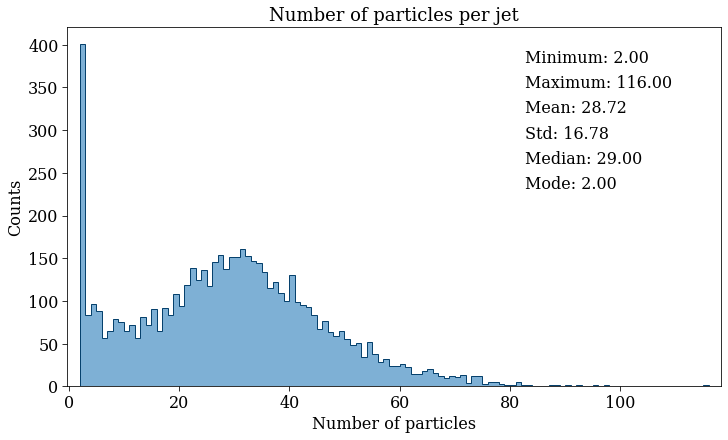

In [133]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["nParticles"].min()
xmax = jet_df["nParticles"].max()

step = 1
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["nParticles"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Number of particles per jet",
    xlab     = "Number of particles",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # 2% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["nParticles"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "nParticles_distribution.pdf")

plt.show()

## Jet Area

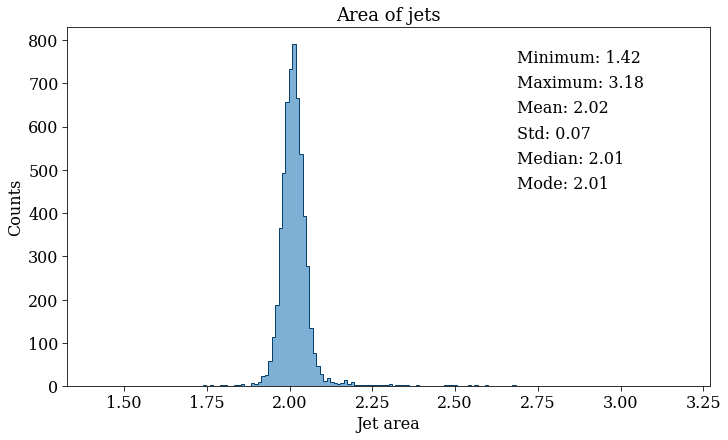

In [134]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetArea"].min()
xmax = jet_df["jetArea"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetArea"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Area of jets",
    xlab     = "Jet area",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 5 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetArea"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetArea_distribution.pdf")

plt.show()

## 4-momentum of Jets

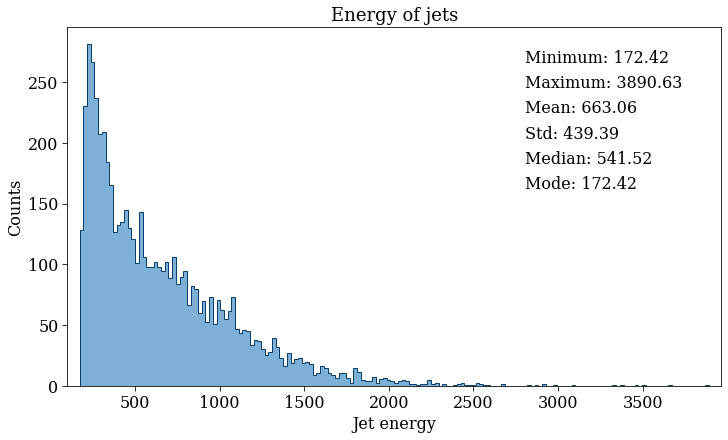

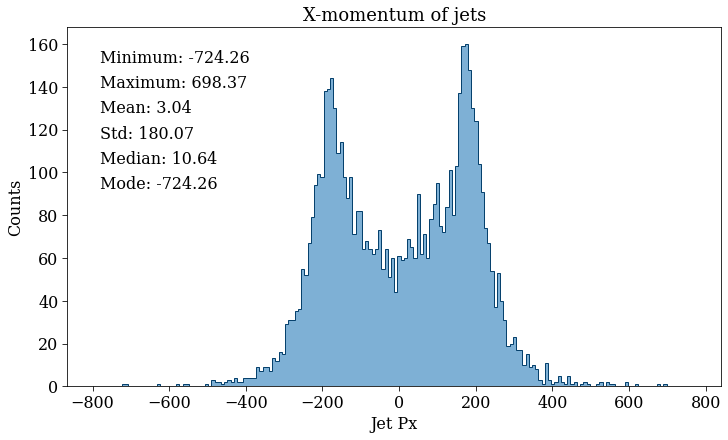

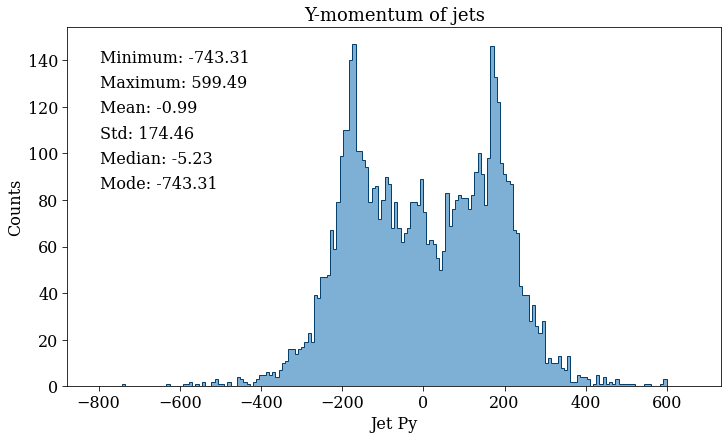

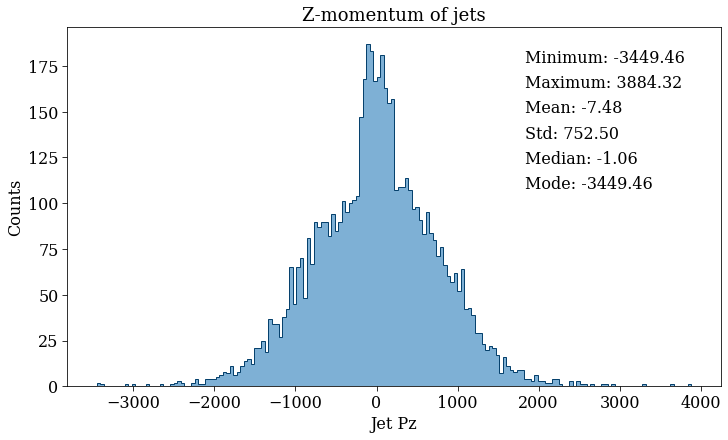

In [135]:
# --------- ENERGY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetE"].min()
xmax = jet_df["jetE"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Energy of jets",
    xlab     = "Jet energy",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetE"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetEnergy_distribution.pdf")


# --------- PX
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPx"].min()
xmax = jet_df["jetPx"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "X-momentum of jets",
    xlab     = "Jet Px",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 10 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetPx"], ax, fontsize=FONTSIZE, x=0.05, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPx_distribution.pdf")


# --------- PY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPy"].min()
xmax = jet_df["jetPy"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Y-momentum of jets",
    xlab     = "Jet Py",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 10 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetPy"], ax, fontsize=FONTSIZE, x=0.05, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPy_distribution.pdf")
    

# --------- PZ
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPz"].min()
xmax = jet_df["jetPz"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Z-momentum of jets",
    xlab     = "Jet Pz",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 5 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetPz"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPz_distribution.pdf")
    
    
plt.show()

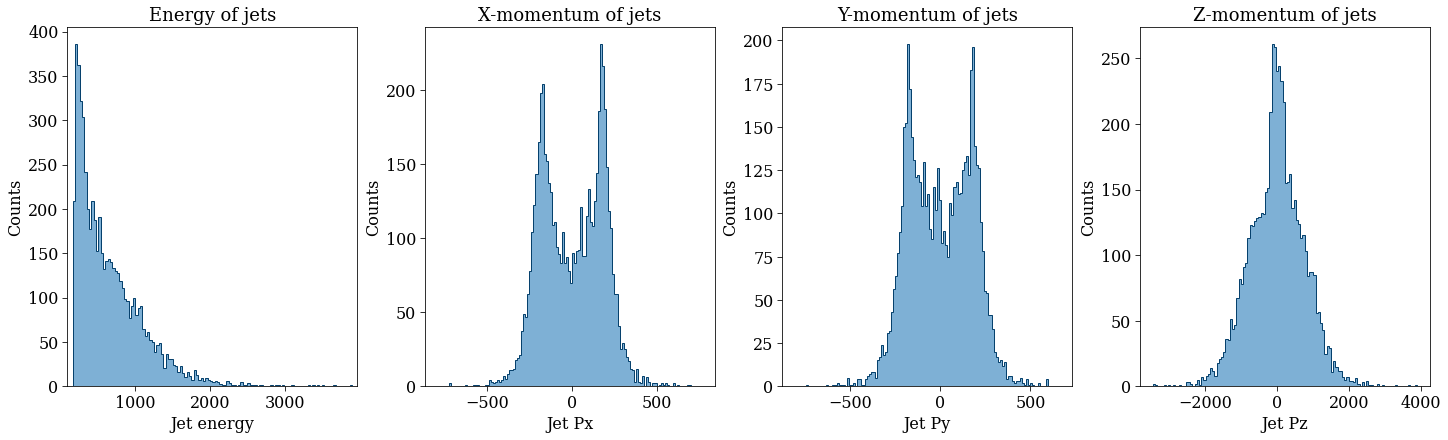

In [136]:
# 4-MOMENTUM

# figure that holds 4 subplots: 1 row 4 columns
fig = plt.figure(figsize=(20, 6), constrained_layout=True)

# --------- ENERGY

xmin = jet_df["jetE"].min()
xmax = jet_df["jetE"].max()

n = 120
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Energy of jets",
    xlab     = "Jet energy",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 1
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)




# --------- PX

xmin = jet_df["jetPx"].min()
xmax = jet_df["jetPx"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "X-momentum of jets",
    xlab     = "Jet Px",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 2
)

x_delta = (xmax - xmin) / 100 * 10 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)



# --------- PY

xmin = jet_df["jetPy"].min()
xmax = jet_df["jetPy"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Y-momentum of jets",
    xlab     = "Jet Py",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 3
)

x_delta = (xmax - xmin) / 100 * 10 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


    

# --------- PZ

xmin = jet_df["jetPz"].min()
xmax = jet_df["jetPz"].max()


step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Z-momentum of jets",
    xlab     = "Jet Pz",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id = 4
)

x_delta = (xmax - xmin) / 100 * 5 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


if SAVE_FIG:
    save_fig(fig, "jet4momentum.pdf")
    
    
plt.show()

## Polar 4-momentum of Jets

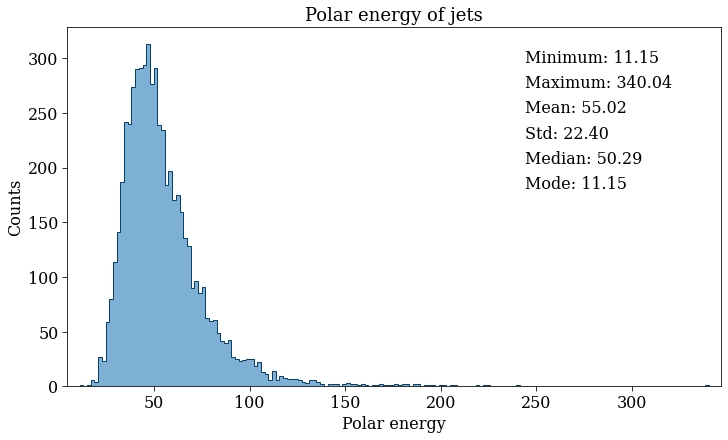

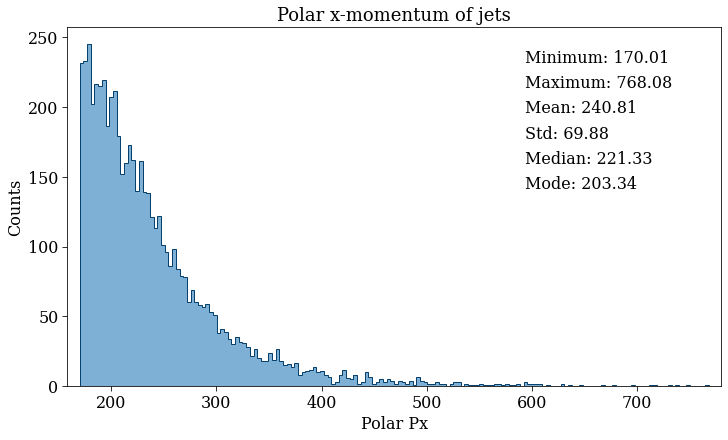

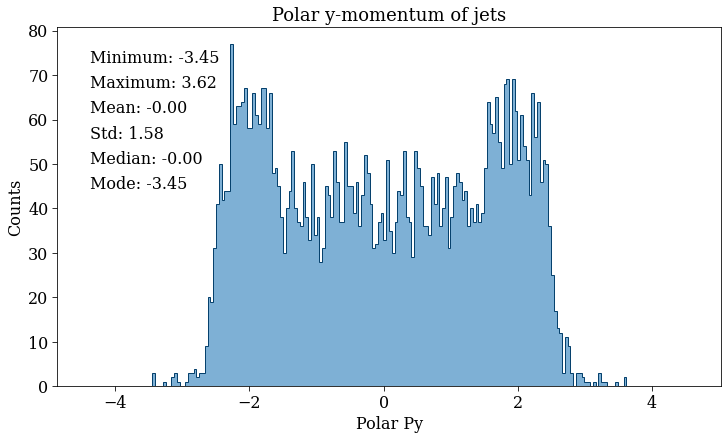

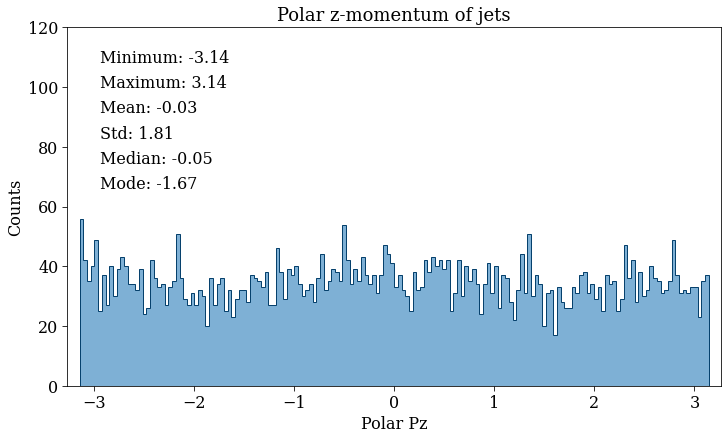

In [137]:
# --------- ENERGY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPolarE"].min()
xmax = jet_df["jetPolarE"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar energy of jets",
    xlab     = "Polar energy",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetPolarE"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPolarEnergy_distribution.pdf")


# --------- PX
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPolarPx"].min()
xmax = jet_df["jetPolarPx"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarPx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar x-momentum of jets",
    xlab     = "Polar Px",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetPolarPx"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPolarPx_distribution.pdf")


# --------- PY
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPolarPy"].min()
xmax = jet_df["jetPolarPy"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarPy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar y-momentum of jets",
    xlab     = "Polar Py",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 20 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

ax = display_statistics(jet_df["jetPolarPy"], ax, fontsize=FONTSIZE, x=0.05, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPolarPy_distribution.pdf")
    

# --------- PZ
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPolarPz"].min()
xmax = jet_df["jetPolarPz"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarPz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar z-momentum of jets",
    xlab     = "Polar Pz",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)
ax.set_ylim(top=120)

ax = display_statistics(jet_df["jetPolarPz"], ax, fontsize=FONTSIZE, x=0.05, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPolarPz_distribution.pdf")
    
    
plt.show()

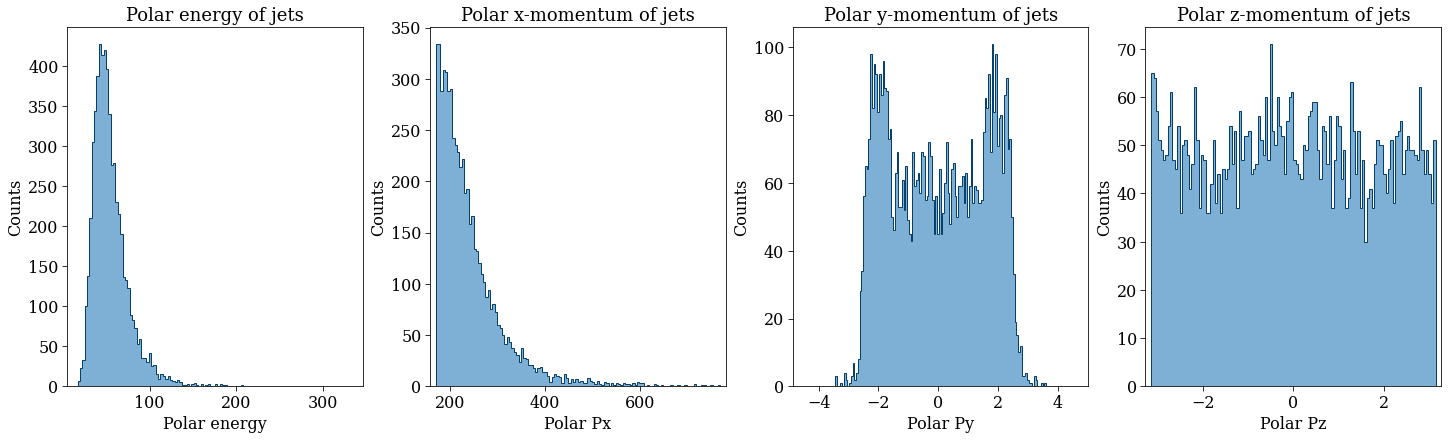

In [138]:
# --------- ENERGY
fig = plt.figure(figsize=(20, 6), constrained_layout=True)

xmin = jet_df["jetPolarE"].min()
xmax = jet_df["jetPolarE"].max()

n = 120
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarE"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar energy of jets",
    xlab     = "Polar energy",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id    = 1
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)



# --------- PX

xmin = jet_df["jetPolarPx"].min()
xmax = jet_df["jetPolarPx"].max()

step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarPx"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar x-momentum of jets",
    xlab     = "Polar Px",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id    = 2
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)



# --------- PY

xmin = jet_df["jetPolarPy"].min()
xmax = jet_df["jetPolarPy"].max()

step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarPy"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar y-momentum of jets",
    xlab     = "Polar Py",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id    = 3
)

x_delta = (xmax - xmin) / 100 * 20 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)

    

# --------- PZ

xmin = jet_df["jetPolarPz"].min()
xmax = jet_df["jetPolarPz"].max()

step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPolarPz"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar z-momentum of jets",
    xlab     = "Polar Pz",
    ylab     = "Counts",
    legend   = False, 
    nrows    = 1,
    ncols    = 4,
    ax_id    = 4
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


if SAVE_FIG:
    save_fig(fig, "jetPolar4momentum.pdf")
    
    
plt.show()

## Phi and Theta of Jets

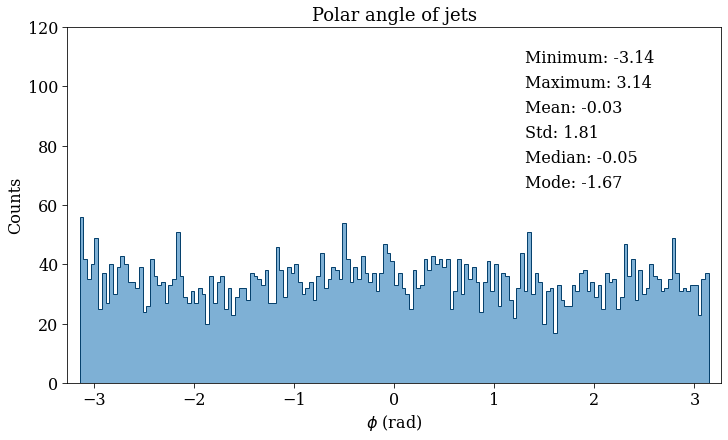

In [139]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetPhi"].min()
xmax = jet_df["jetPhi"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetPhi"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Polar angle of jets",
    xlab     = "$\phi$ (rad)",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)
ax.set_ylim(top=120)

ax = display_statistics(jet_df["jetPhi"], ax, fontsize=FONTSIZE, x=0.70, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetPhi_distribution.pdf")

plt.show()

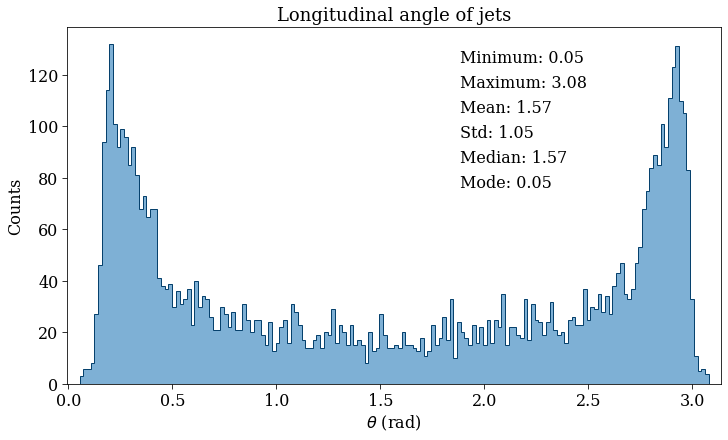

In [140]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

xmin = jet_df["jetTheta"].min()
xmax = jet_df["jetTheta"].max()

n = 170
step = (xmax - xmin) / n
bins = np.arange(xmin, xmax+step, step)

ax = plot_1Dhist(
    fig      = fig,
    data     = jet_df["jetTheta"],
    bins     = bins,
    fontsize = FONTSIZE,
    title    = "Longitudinal angle of jets",
    xlab     = r"$\theta$ (rad)",
    ylab     = "Counts",
    legend   = False
)

x_delta = (xmax - xmin) / 100 * 2 # x% of the x-axis range
ax.set_xlim(xmin-x_delta, xmax+x_delta)


ax = display_statistics(jet_df["jetTheta"], ax, fontsize=FONTSIZE, x=0.6, y=0.90, step=0.07)

if SAVE_FIG:
    save_fig(fig, "jetTheta_distribution.pdf")

plt.show()